# AutoEncoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

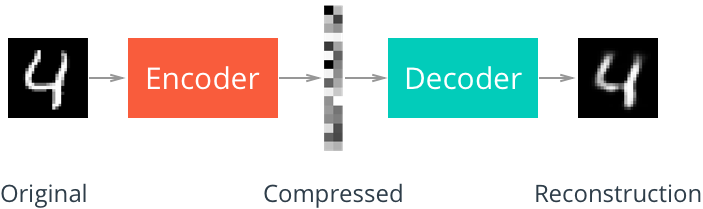

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np
import torch
import matplotlib.pyplot as plt
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the pixel values to be in the range [0, 1]
X_train = X_train.astype(np.float32) / 255.0
X_test = X_test.astype(np.float32) / 255.0

num_workers = 0
# how many samples per batch to load
batch_size = 20

# prepare data loaders
train_loader = torch.utils.data.DataLoader(X_train, batch_size=batch_size, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(X_test, batch_size=batch_size, num_workers=num_workers)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Visualization

In [2]:
def show_images(images, labels):
    """
    Display a set of images and their labels using matplotlib.
    The first column of `images` should contain the image indices,
    and the second column should contain the flattened image pixels
    reshaped into 28x28 arrays.
    """
    # Extract the image indices and reshaped pixels
    pixels = images.reshape(-1, 28, 28)

    # Create a figure with subplots for each image
    fig, axs = plt.subplots(
        ncols=min(len(images),10), nrows=1, figsize=(10, 3 * min(10,len(images)))
    )

    # Loop over the images and display them with their labels
    for i in range(min(len(images),10)):
        # Display the image and its label
        axs[i].imshow(pixels[i], cmap="gray")
        axs[i].set_title("Label: {}".format(labels[i]))

        # Remove the tick marks and axis labels
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        axs[i].set_xlabel("Index: {}".format(i))

    # Adjust the spacing between subplots
    fig.subplots_adjust(hspace=0.5)

    # Show the figure
    plt.show()

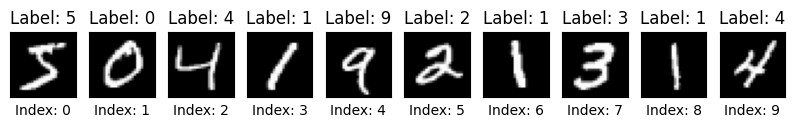

In [3]:
show_images(X_train, y_train)

## Architecture

In [24]:
import torch.nn as nn
import torch.nn.functional as F

# define the NN architecture
class Autoencoder(nn.Module):
    def __init__(self, encoding_dim):
        super(Autoencoder, self).__init__()
        ## encoder ##
        self.fc1 = nn.Linear(28*28, encoding_dim)
        self.fc2 = nn.Linear(encoding_dim, 28*28)
        ## decoder ##


    def forward(self, x):
        # define feedforward behavior
        # and scale the *output* layer with a sigmoid activation function
        x = F.relu(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        return x


## Train

In [28]:
# Create the autoencoder model and optimizer
encoding_dim = 4
model = Autoencoder(encoding_dim)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Define the loss function
criterion = nn.MSELoss()

# Set the device to GPU if available, otherwise use CPU
device='cuda'
model.to(device)

Autoencoder(
  (fc1): Linear(in_features=784, out_features=4, bias=True)
  (fc2): Linear(in_features=4, out_features=784, bias=True)
)

In [29]:
# number of epochs to train the model
n_epochs = 20

for epoch in range(1, n_epochs+1):
    # monitor training loss
    train_loss = 0.0

    ###################
    # train the model #
    ###################
    for images in train_loader:

        ### training code ###
        images = images.to(device)
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*images.size(0)

    # print avg training statistics
    train_loss = train_loss/len(train_loader)
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch,
        train_loss
        ))

Epoch: 1 	Training Loss: 1.490595
Epoch: 2 	Training Loss: 1.215091
Epoch: 3 	Training Loss: 1.154939
Epoch: 4 	Training Loss: 1.132552
Epoch: 5 	Training Loss: 1.121539
Epoch: 6 	Training Loss: 1.116499
Epoch: 7 	Training Loss: 1.114284
Epoch: 8 	Training Loss: 1.113049
Epoch: 9 	Training Loss: 1.112245
Epoch: 10 	Training Loss: 1.111732
Epoch: 11 	Training Loss: 1.111336
Epoch: 12 	Training Loss: 1.111043
Epoch: 13 	Training Loss: 1.110823
Epoch: 14 	Training Loss: 1.110647
Epoch: 15 	Training Loss: 1.110504
Epoch: 16 	Training Loss: 1.110394
Epoch: 17 	Training Loss: 1.110300
Epoch: 18 	Training Loss: 1.110222
Epoch: 19 	Training Loss: 1.110153
Epoch: 20 	Training Loss: 1.110083


## Evaluation

encoding_dim = 4

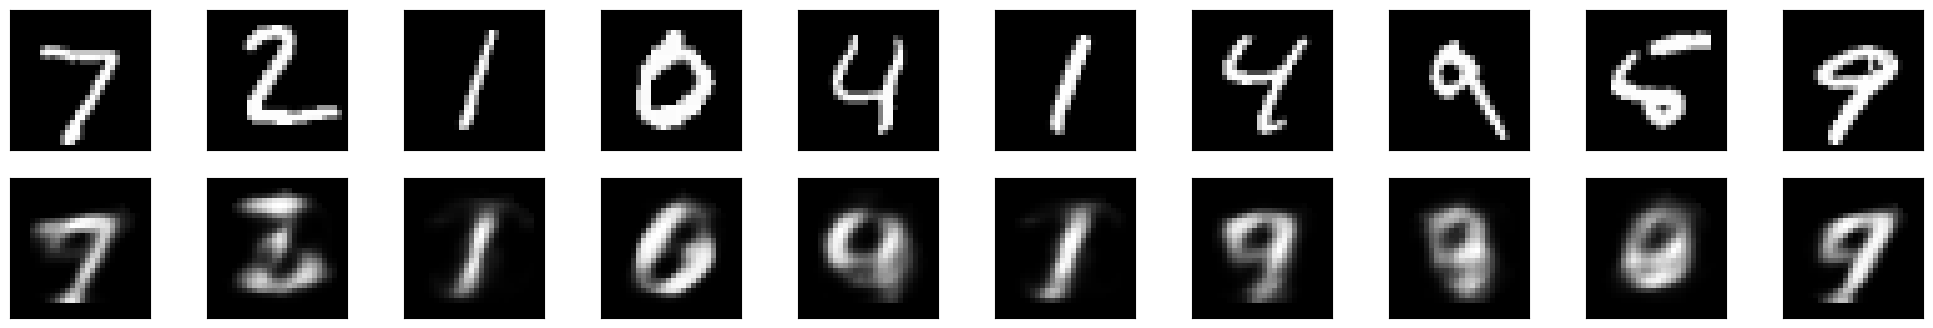

In [27]:
import matplotlib.pyplot as plt

# obtain one batch of test images
dataiter = iter(test_loader)
images = next(dataiter).to(device)

images_flatten = images.view(images.size(0), -1)
# get sample outputs
output = model(images_flatten)
# prep images for display
images = images.cpu().numpy()

# output is resized into a batch of images
output = output.view(batch_size, 1, 28, 28)
# use detach when it's an output that requires_grad
output = output.cpu().detach().numpy()

# plot the first ten input images and then reconstructed images
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25,4))

# input images on top row, reconstructions on bottom
for images, row in zip([images, output], axes):
    for img, ax in zip(images, row):
        ax.imshow(np.squeeze(img), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

encoding_dim = 8

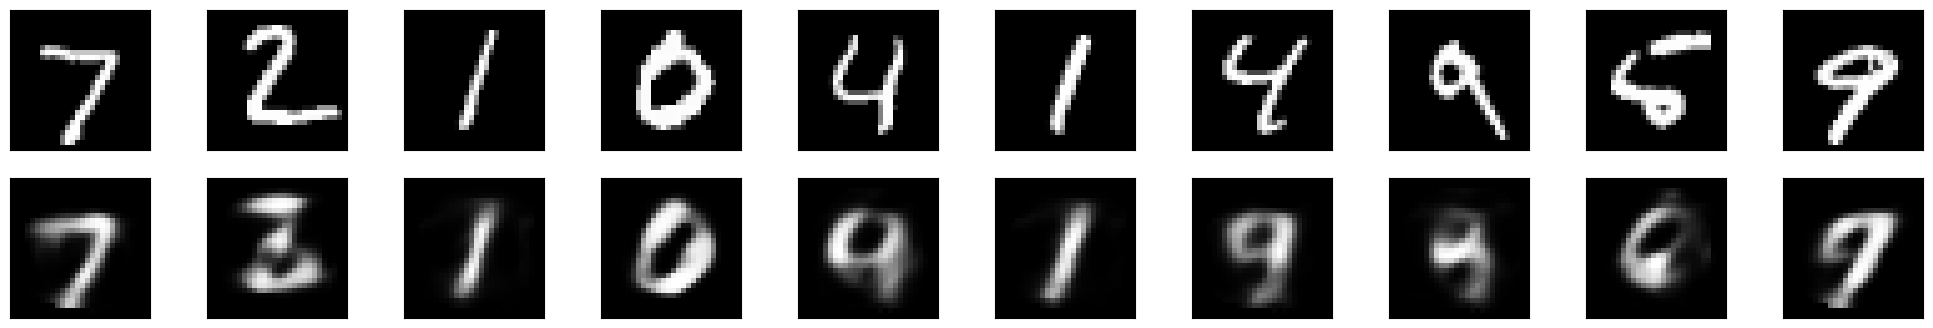

In [18]:
import matplotlib.pyplot as plt

# obtain one batch of test images
dataiter = iter(test_loader)
images = next(dataiter).to(device)

images_flatten = images.view(images.size(0), -1)
# get sample outputs
output = model(images_flatten)
# prep images for display
images = images.cpu().numpy()

# output is resized into a batch of images
output = output.view(batch_size, 1, 28, 28)
# use detach when it's an output that requires_grad
output = output.cpu().detach().numpy()

# plot the first ten input images and then reconstructed images
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25,4))

# input images on top row, reconstructions on bottom
for images, row in zip([images, output], axes):
    for img, ax in zip(images, row):
        ax.imshow(np.squeeze(img), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

encoding_dim = 16

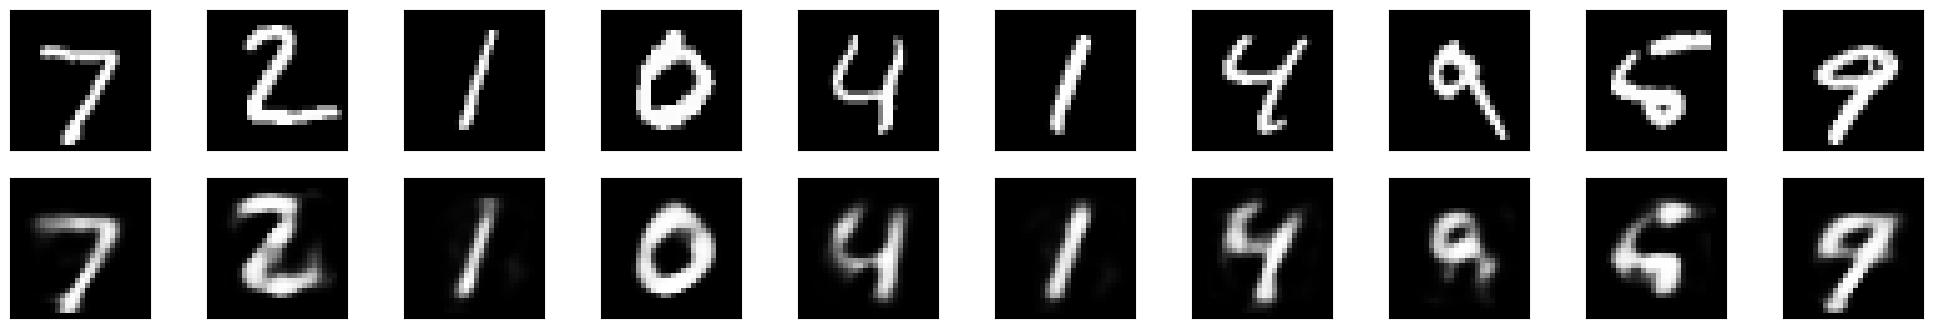

In [15]:
import matplotlib.pyplot as plt

# obtain one batch of test images
dataiter = iter(test_loader)
images = next(dataiter).to(device)

images_flatten = images.view(images.size(0), -1)
# get sample outputs
output = model(images_flatten)
# prep images for display
images = images.cpu().numpy()

# output is resized into a batch of images
output = output.view(batch_size, 1, 28, 28)
# use detach when it's an output that requires_grad
output = output.cpu().detach().numpy()

# plot the first ten input images and then reconstructed images
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25,4))

# input images on top row, reconstructions on bottom
for images, row in zip([images, output], axes):
    for img, ax in zip(images, row):
        ax.imshow(np.squeeze(img), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

encoding_dim = 32

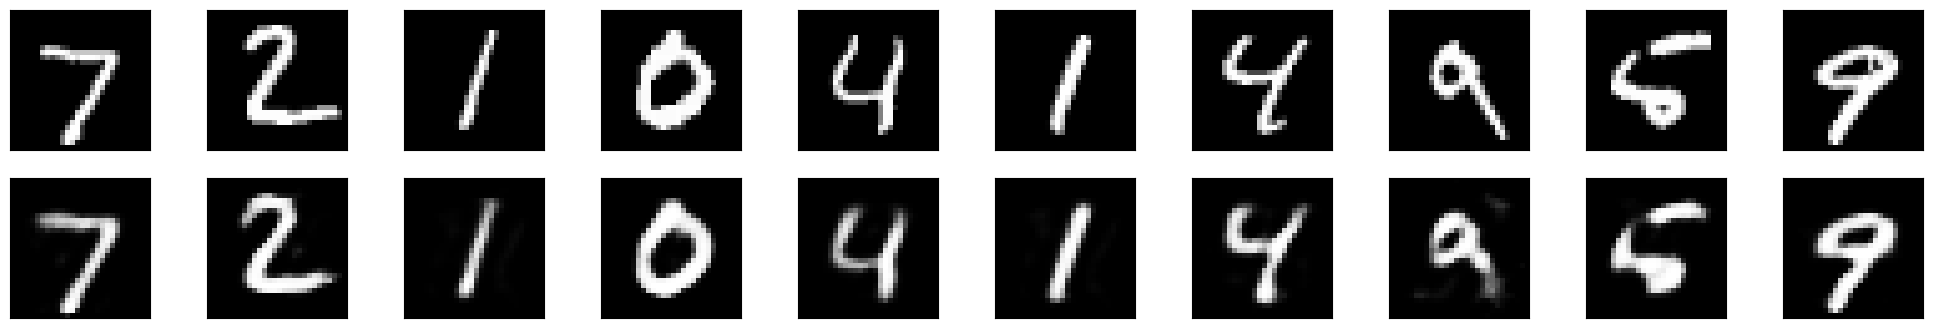

In [12]:
import matplotlib.pyplot as plt

# obtain one batch of test images
dataiter = iter(test_loader)
images = next(dataiter).to(device)

images_flatten = images.view(images.size(0), -1)
# get sample outputs
output = model(images_flatten)
# prep images for display
images = images.cpu().numpy()

# output is resized into a batch of images
output = output.view(batch_size, 1, 28, 28)
# use detach when it's an output that requires_grad
output = output.cpu().detach().numpy()

# plot the first ten input images and then reconstructed images
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25,4))

# input images on top row, reconstructions on bottom
for images, row in zip([images, output], axes):
    for img, ax in zip(images, row):
        ax.imshow(np.squeeze(img), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)